In [1]:
from typing import List 

import random 
import time 



In [2]:
import sys
sys.path.append('/home/benshalom/MEA_Analysis/MaxwellBiosystemsDeviceInterface')

In [3]:
import maxlab as mx

# Preparing the Electrode Selection

In [ ]:
'''Two categories of electrodes: Recording Electrodes (electrodes) and Stimulation Electrodes (stim_electrodes). '''
# Example 
electrodes = [4885, 4886, 4887, 4888, 4889] # list of recording electrodes
stim_electrodes = [4890, 4891, 4892, 4893, 4894] # list of stimulation electrodes
# Maximum number of electrodes is 1020 
# Maximum number of stimulation electrodes is 32

In [ ]:
# existing electrode configurations can be loaded from a file
array = mx.Array("stimulation") 
array.load_config("path/to/example_config.cfg") # loads a configuration file

In [59]:
from matplotlib.patches import Rectangle

def add_shaded_blocks(ax, rows, cols, block_size=2, separation=1, color="blue", alpha=0.2):
    """
    Add shaded blocks of 4 units (2x2) with 1 unit separation to an existing grid.

    Args:
        ax (matplotlib.axes.Axes): The axes to add the shaded blocks to.
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        block_size (int): Size of the blocks (default is 2x2).
        separation (int): Separation between blocks and edges (default is 1 unit).
        color (str): Color of the shaded blocks (default is "blue").
        alpha (float): Transparency of the shaded blocks (default is 0.2).

    Returns:
        None
    """
    for row in range(separation, rows - block_size + 1, block_size + separation):
        for col in range(separation, cols - block_size + 1, block_size + separation):
            # Add a shaded rectangle for each block
            rect = Rectangle((col, rows - row - block_size), block_size, block_size, 
                             edgecolor="none", facecolor=color, alpha=alpha)
            ax.add_patch(rect)

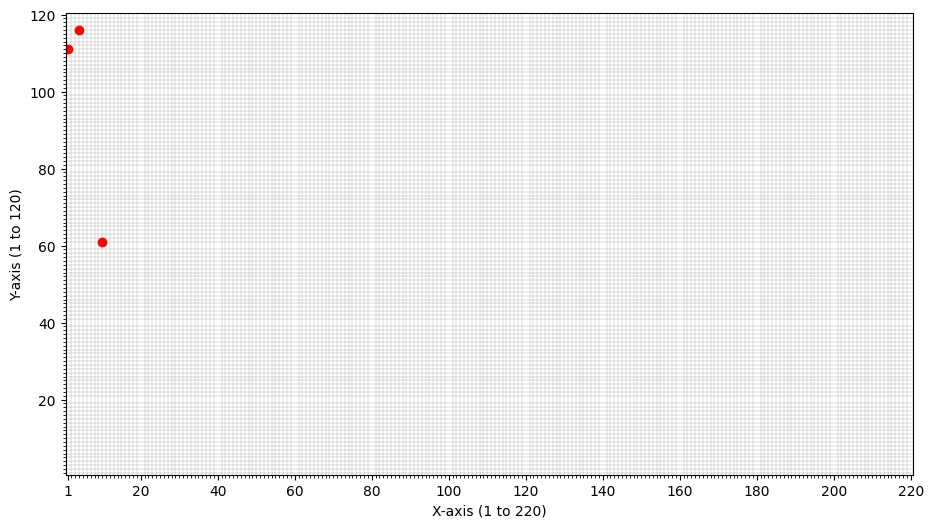

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def create_grid_with_hover(rows=120, cols=220, highlight_coords=None):
    """
    Create a 120x220 grid with hover functionality to display (x, y) coordinates.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_coords (list): List of (x, y) coordinate pairs to highlight.

    Returns:
        None
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

# Example usage

    # Convert (x, y) coordinates to grid indices and highlight them
    if highlight_coords:
        for x, y in highlight_coords:
            row = y - 1  # y corresponds to rows (1-indexed to 0-indexed)
            col = x - 1  # x corresponds to columns (1-indexed to 0-indexed)
            grid[row, col] = 1  # Mark the coordinate as highlighted

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0.5, cols + 0.5, 0.5, rows + 0.5])

    # Highlight specific coordinates with red dots
    if highlight_coords:
        for x, y in highlight_coords:
            ax.plot(x, rows - y + 1, 'ro')  # Plot red dot at the specified coordinate

    # Set gridlines
    ax.set_xticks(np.arange(1, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(1, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Remove x and y axis ticks
    ax.set_xticks([1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
    ax.set_yticks([120, 100, 80, 60, 40, 20, 0])

    # Set axis labels
    ax.set_xlabel("X-axis (1 to 220)")
    ax.set_ylabel("Y-axis (1 to 120)")
    ax.set_xlim(0.5, cols + 0.5)
    ax.set_ylim(0.5, rows + 0.5)

    # Add hover functionality
    def on_hover(event):
        if event.inaxes == ax:
            # Convert mouse position to grid coordinates
            x = int(event.xdata + 0.5)  # Round to nearest integer
            y = int(rows - event.ydata + 0.5)  # Adjust for inverted y-axis
            if 1 <= x <= cols and 1 <= y <= rows:
                ax.set_title(f"Hovering over: (x={x}, y={y})")
                fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", on_hover)

    plt.show()

# Example usage
# Input coordinate pairs (x, y) to highlight
highlight_coords = [(4, 5), (1, 10), (10, 60)]  # Example coordinates
create_grid_with_hover(highlight_coords=highlight_coords)


Highlighted Units Inside the Region: [1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411]
Highlighted rectangle coordinates: (52.5, 87.5) to (175, 350)
128


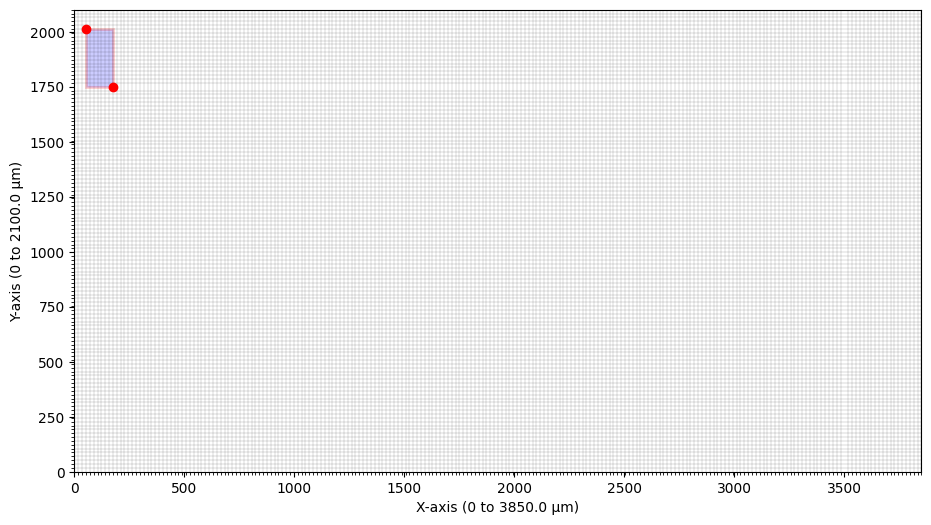

[1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 2204,
 2205,
 2206,
 2207,
 2208,
 2209,
 2210,
 2211,
 2424,
 2425,
 2426,
 2427,
 2428,
 2429,
 2430,
 2431,
 2644,
 2645,
 2646,
 2647,
 2648,
 2649,
 2650,
 2651,
 2864,
 2865,
 2866,
 2867,
 2868,
 2869,
 2870,
 2871,
 3084,
 3085,
 3086,
 3087,
 3088,
 3089,
 3090,
 3091,
 3304,
 3305,
 3306,
 3307,
 3308,
 3309,
 3310,
 3311,
 3524,
 3525,
 3526,
 3527,
 3528,
 3529,
 3530,
 3531,
 3744,
 3745,
 3746,
 3747,
 3748,
 3749,
 3750,
 3751,
 3964,
 3965,
 3966,
 3967,
 3968,
 3969,
 3970,
 3971,
 4184,
 4185,
 4186,
 4187,
 4188,
 4189,
 4190,
 4191,
 4404,
 4405,
 4406,
 4407,
 4408,
 4409,
 4410,
 4411]

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_2C(rows=120, cols=220, highlight_coords=None, unit_size=17.5):
    """
    Create a 120x220 grid and shade a rectangle based on two given coordinates in micrometers.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_coords (list): List of two (x, y) coordinate pairs in micrometers to form a rectangle.
        unit_size (float): Size of each unit in micrometers.

    Returns:
        list: List of all unit numbers inside the shaded rectangle.
    """
    # Convert grid dimensions to micrometers
    grid_width = cols * unit_size
    grid_height = rows * unit_size

    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0, grid_width, 0, grid_height])

    # Add gridlines
    ax.set_xticks(np.arange(0, grid_width + unit_size, unit_size), minor=True)
    ax.set_yticks(np.arange(0, grid_height + unit_size, unit_size), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Highlight specific coordinates with red dots
    if highlight_coords:
        for x, y in highlight_coords:
            ax.plot(x, grid_height - y, 'ro')  # Plot red dot at the specified coordinate

    # Shade the rectangle based on two coordinates
    if highlight_coords and len(highlight_coords) == 2:
        (x1, y1), (x2, y2) = highlight_coords

        # Determine the rectangle's edges
        min_x, max_x = min(x1, x2), max(x1, x2)
        min_y, max_y = min(y1, y2), max(y1, y2)

        # Add a shaded rectangle
        rect = Rectangle((min_x, grid_height - max_y), max_x - min_x, max_y - min_y,
                         edgecolor="red", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(rect)

        # Collect all unit numbers inside the bounding box
        highlighted_units = []
        for row in range(int(min_y / unit_size), int(max_y / unit_size) + 1):
            for col in range(int(min_x / unit_size), int(max_x / unit_size) + 1):
                unit_number = row * cols + col + 1  # Convert back to 1-indexed unit number
                highlighted_units.append(unit_number)

        if len(highlighted_units) < 1000:
            print("Highlighted Units Inside the Region:", highlighted_units)
            print(f"Highlighted rectangle coordinates: ({min_x}, {min_y}) to ({max_x}, {max_y})")
            print(len(highlighted_units))
        else:
            print("Too many highlighted units to display. Please select a region with fewer units < 1000.")

    # Set axis labels
    ax.set_xlabel(f"X-axis (0 to {grid_width} µm)")
    ax.set_ylabel(f"Y-axis (0 to {grid_height} µm)")
    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)

    plt.show()
    return highlighted_units

# Example usage
# Input two coordinates in micrometers to form a rectangle
highlight_coords = [(52.5, 87.5), (175, 350)]  # Example coordinates in micrometers
create_grid_with_2C(highlight_coords=highlight_coords)

Highlighted Units Inside the Region: [4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6389, 6390, 6391, 6392, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 7042, 7043, 7044, 7045, 7046, 7047, 7048, 7049, 7050, 7051, 7052, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7482, 7483, 7484, 7485, 7486, 7487, 74

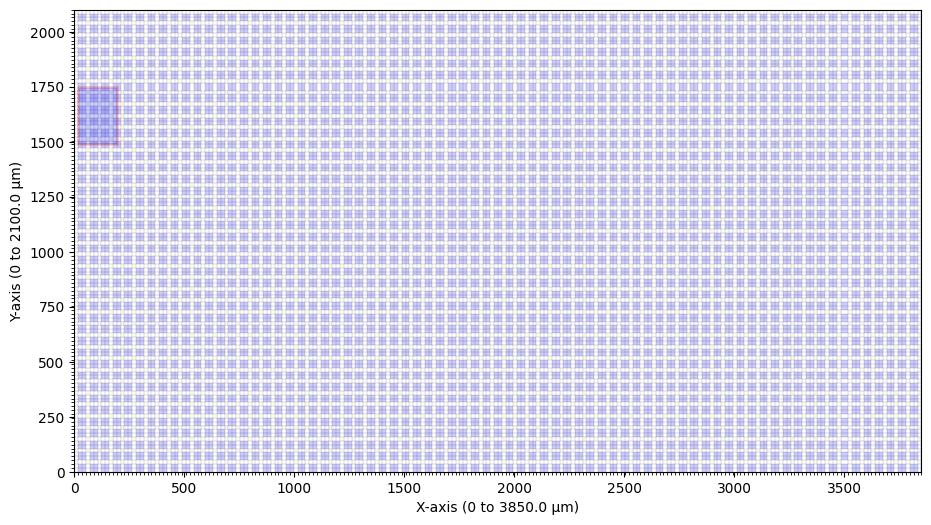

[4402,
 4403,
 4404,
 4405,
 4406,
 4407,
 4408,
 4409,
 4410,
 4411,
 4412,
 4622,
 4623,
 4624,
 4625,
 4626,
 4627,
 4628,
 4629,
 4630,
 4631,
 4632,
 4842,
 4843,
 4844,
 4845,
 4846,
 4847,
 4848,
 4849,
 4850,
 4851,
 4852,
 5062,
 5063,
 5064,
 5065,
 5066,
 5067,
 5068,
 5069,
 5070,
 5071,
 5072,
 5282,
 5283,
 5284,
 5285,
 5286,
 5287,
 5288,
 5289,
 5290,
 5291,
 5292,
 5502,
 5503,
 5504,
 5505,
 5506,
 5507,
 5508,
 5509,
 5510,
 5511,
 5512,
 5722,
 5723,
 5724,
 5725,
 5726,
 5727,
 5728,
 5729,
 5730,
 5731,
 5732,
 5942,
 5943,
 5944,
 5945,
 5946,
 5947,
 5948,
 5949,
 5950,
 5951,
 5952,
 6162,
 6163,
 6164,
 6165,
 6166,
 6167,
 6168,
 6169,
 6170,
 6171,
 6172,
 6382,
 6383,
 6384,
 6385,
 6386,
 6387,
 6388,
 6389,
 6390,
 6391,
 6392,
 6602,
 6603,
 6604,
 6605,
 6606,
 6607,
 6608,
 6609,
 6610,
 6611,
 6612,
 6822,
 6823,
 6824,
 6825,
 6826,
 6827,
 6828,
 6829,
 6830,
 6831,
 6832,
 7042,
 7043,
 7044,
 7045,
 7046,
 7047,
 7048,
 7049,
 7050,
 7051,
 7052,

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_WH(rows=120, cols=220, corner_point=None, width=None, height=None, unit_size=17.5):
    """
    Create a 120x220 grid and shade a rectangle based on a corner point, width, and height in micrometers.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        corner_point (tuple): The (x, y) coordinate of the top-left corner of the rectangle in micrometers.
        width (float): The width of the rectangle in micrometers.
        height (float): The height of the rectangle in micrometers.
        unit_size (float): Size of each unit in micrometers.

    Returns:
        list: List of all unit numbers inside the shaded rectangle.
    """
    # Convert grid dimensions to micrometers
    grid_width = cols * unit_size
    grid_height = rows * unit_size

    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0, grid_width, 0, grid_height])

    # Add shaded blocks of 4 units (2x2) with 1 unit separation
    block_size = 2 * unit_size  # 2x2 blocks in micrometers
    separation = unit_size  # 1 unit separation in micrometers
    for row in range(1, rows - 1, 3):  # Adjust for block size and separation
        for col in range(1, cols - 1, 3):
            rect = Rectangle((col * unit_size, grid_height - (row + 2) * unit_size), block_size, block_size,
                             edgecolor="none", facecolor="blue", alpha=0.2)
            ax.add_patch(rect)

    # Shade the rectangle based on the corner point, width, and height
    if corner_point and width and height:
        x1, y1 = corner_point

        # Add a shaded rectangle
        rect = Rectangle((x1, grid_height - (y1 + height)), width, height,
                         edgecolor="red", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(rect)

        # Collect all unit numbers inside the bounding box
        highlighted_units = []
        for row in range(int(y1 / unit_size), int((y1 + height) / unit_size) + 1):
            for col in range(int(x1 / unit_size), int((x1 + width) / unit_size) + 1):
                unit_number = row * cols + col + 1  # Convert to 1-indexed unit number
                highlighted_units.append(unit_number)

        if len(highlighted_units) < 1000:
            print("Highlighted Units Inside the Region:", highlighted_units)
            print(f"Highlighted rectangle coordinates: ({x1}, {y1}) to ({x1 + width}, {y1 + height})")
            print(len(highlighted_units))
        else:
            print("Too many highlighted units to display. Please select a region with fewer units < 1000.")

    # Set gridlines
    ax.set_xticks(np.arange(0, grid_width + unit_size, unit_size), minor=True)
    ax.set_yticks(np.arange(0, grid_height + unit_size, unit_size), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Set axis labels
    ax.set_xlabel(f"X-axis (0 to {grid_width} µm)")
    ax.set_ylabel(f"Y-axis (0 to {grid_height} µm)")
    ax.set_xlim(0,grid_width)
    ax.set_ylim(0, grid_height)

    plt.show()
    return highlighted_units

# Example usage
# Input the top-left corner point, width, and height in micrometers
corner_point = (17.5, 350)  # Top-left corner (x1, y1) in micrometers
width = 175  # Width of the rectangle in micrometers
height = 262.5  # Height of the rectangle in micrometers
create_grid_with_WH(corner_point=corner_point, width=width, height=height)